# First, rename your lab so that it includes your name

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In the previous lab, we used the "Euler method" to solve a set of first order differential equations:
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x$$

$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y$$

We can numerically solve this problem by introducing a time step $\Delta t$, and thus:

$$\displaystyle x_f = x + v_x \Delta t \qquad \qquad v_{xf} = v_x + a_x \Delta t$$

$$\displaystyle y_f = y + v_y \Delta t \qquad \qquad v_{yf} = v_y + a_y \Delta t$$

To solve the projectile motion problem ($a_x = 0, a_y = -g$), we created a function ``time_step`` that used its arguments of the previous time information (x, y, vx, vy) and $\Delta t$ as inputs, and returned the next time step information,

In [2]:
def time_step(x,y,vx,vy,dt):
    ax = 0
    ay = - 9.8
    xf = x + vx * dt
    yf = y + vy * dt
    vxf = vx + ax * dt
    vyf = vy + ay * dt
    
    return xf, yf, vxf, vyf

We were able to solve this problem using a loop:

In [3]:
time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40

x_step[0] = x
y_step[0] = y

for i in range(1,len(time)):
    x, y, vx, vy = time_step(x, y, vx, vy, dt)
    x_step[i] = x
    y_step[i] = y

and we can plot the results:

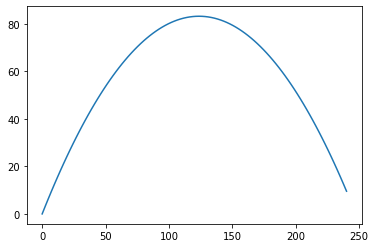

In [4]:
plt.figure()
plt.plot(x_step, y_step)
plt.show()

However, we found that energy was not perfectly conserved, requiring more time intensive calculations.

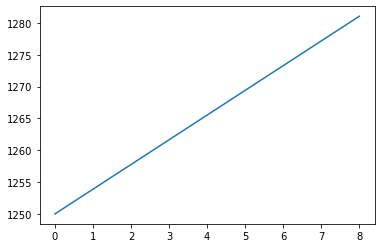

In [5]:
def energy(x,y,vx,vy):
    return 0.5*(vx**2 + vy**2) + 9.8 * y

time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
e_step = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40

x_step[0] = x
y_step[0] = y
e_step[0] = energy(x,y,vx,vy)

for i in range(1,len(time)):
    x, y, vx, vy = time_step(x, y, vx, vy, dt)
    x_step[i] = x
    y_step[i] = y
    e_step[i] = energy(x,y,vx,vy)

plt.figure()
plt.plot(time, e_step)
plt.show()

**Second Order Runge-Kutta Method** is a way of getting more bang for our computing buck.  Our original method just makes one calculation to take us from one time step to another.  What if we could do twice as many calculations, but get more than twice the accuracy from it?  That's the promise of Runge-Kutta methods.  A second order Runge-Kutta method (called Heun's method) is:

$$ k1_x = v_x \, \Delta t \qquad k1_y = v_y \, \Delta t$$
$$ k1_{vx} = a_x \, \Delta t \qquad k1_{vy} = a_y \, \Delta t$$

$$ k2_x = (v_x + k1_{vx}) \, \Delta t \qquad k2_y = (v_y + k1_{vy}) \, \Delta t$$
$$ k2_{vx} = a_x \, \Delta t \qquad k2_{vy} = a_y \, \Delta t$$

$$ x_f = x + 0.5 (k1_x + k2_x) \qquad y_f = y + 0.5 (k1_y + k2_y)$$
$$ v_{xf} = v_x + 0.5 (k1_{vx} + k2_{vx}) \qquad v_{yf} = v_y + 0.5 (k1_{vy} + k2_{vy})$$

Here, we're using $a_x = 0$ and $a_y = - 9.8$.  Set up a new function, let's call it ``time_step2`` that uses a simimar structure to ``time_step``:  it takes as inputs x, y, vx, vy, $\Delta t$, and will return the next values of x, y, vx, vy.  So, it should look similar, except for the multiple different steps in the middle:

In [6]:
def time_step2(x, y, vx, vy, dt):
    ax = 0
    ay = -9.8
    
    k1x = vx * dt
    k1y = vy * dt
    k1vx = ax * dt
    k1vy = ay * dt
    
    k2x = (vx + k1vx) * dt
    k2y = (vy + k1vy) * dt
    k2vx = ax * dt
    k2vy = ay * dt
    
    xf = x + 0.5 * (k1x + k2x)
    yf = y + 0.5 * (k1y + k2y)
    vxf = vx + 0.5 * (k1vx + k2vx)
    vyf = vy + 0.5 * (k1vy + k2vy)
    
    return xf, yf, vxf, vyf

Repeat the work done above of solving these differential equations, however, use ``time_step2`` instead of ``time_step`` to show that energy is actually perfectly conserved.  In this instance (not most, but this one which has quadratic solutions), the numerical solution is exact.

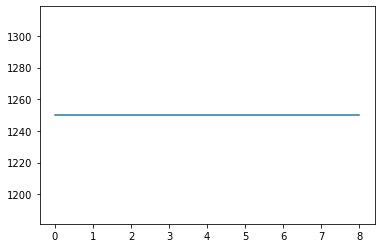

In [7]:
def energy2(x,y,vx,vy):
    return 0.5*(vx**2 + vy**2) + 9.8 * y

time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
e_step = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40

x_step[0] = x
y_step[0] = y
e_step[0] = energy2(x,y,vx,vy)

for i in range(1,len(time)):
    x, y, vx, vy = time_step2(x, y, vx, vy, dt)
    x_step[i] = x
    y_step[i] = y
    e_step[i] = energy2(x,y,vx,vy)

plt.figure()
plt.plot(time, e_step)
plt.show()

**Using arrays**.  Ok, that's effective, but takes lots of coding.  What if we have more than four differential equations to solve?  Do we need to do a ton of typing?  (And make a ton of typographical errors???)

``numpy`` arrays have useful mathematical properties that can help us get around it.

First let's create two arrays,

In [8]:
array_1 = np.zeros(3)
array_1[0] = 2
array_1[1] = 8
array_1[2] = -3

array_2 = np.zeros(3)
array_2[:] = [1, -2, 7]

In [9]:
print(array_1)
print(array_2)

[ 2.  8. -3.]
[ 1. -2.  7.]


These are two ways to create arrays to add to others that we've already used (we've used ``np.linspace()``, a ``for`` loop to set the array elements, and also ``np.loadtxt()``).

Now that we have arrays, we can actually do mathematical operations.  Print the results of adding, subtracting, multiplying, and dividing these arrays, and confirm that the results make sense.

In [10]:
print(array_1 + array_2)
print(array_1 * array_2)
print(array_1 - array_2)
print(array_1 / array_2)

[3. 6. 4.]
[  2. -16. -21.]
[  1.  10. -10.]
[ 2.         -4.         -0.42857143]


We can also do actions on each term, for example:

In [11]:
print(array_1**2)

[ 4. 64.  9.]


predict the result of ``array_2**2``, then confirm your prediction

[1.  4.  49.]

In [12]:
print(array_2**2)

[ 1.  4. 49.]


Let's use this with our original Euler's method technique, and write it in a matrix-type form:
$$ \left( \begin{array}{c} x_f \\ y_f \\ v_{xf} \\ v_{yf} \end{array} \right) = \left( \begin{array}{c} x \\ y \\ v_x \\ v_y \end{array} \right) + \left( \begin{array}{c} v_x \\ v_y \\ a_x \\ a_y \end{array} \right) \Delta t$$
Notice how the final array, $( v_x \quad v_y \quad a_x \quad a_y )$, is an array of the right-hand-side of our differential equations:
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x$$

$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y$$

The structure of the matrix solution is:
$$\displaystyle {\rm final} = {\rm initial} + {\rm derivative} \times \Delta t $$

Let's now manipulate our original ``time_step`` function.  I've given it a new name below, and commented out the previous code so we can see it for comparison:

In [13]:
def time_step_array(x,y,vx,vy,dt):
    ax = 0
    ay = - 9.8
#    xf = x + vx * dt
#    yf = y + vy * dt
#    vxf = vx + ax * dt
#    vyf = vy + ay * dt
    
#    return xf, yf, vxf, vyf

    x_in = np.zeros(4)
    x_in[:] = [x, y, vx, vy]

    derivative = np.zeros(4)
    derivative[:] = [vx, vy, ax, ay]
    
    x_final = x_in + derivative * dt
    
    return x_final[0], x_final[1], x_final[2], x_final[3]

Confirm that this works by again solving for the motion.  We should get the same results.

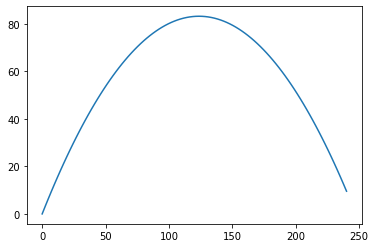

In [14]:
time = np.linspace(0, 8, 100)
dt = time[1] - time[0]
xstep = np.zeros(len(time))
ystep = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40

xstep[0] = x
ystep[0] = y

for i in range(1,len(time)):
    x, y, vx, vy = time_step_array(x, y, vx, vy, dt)
    xstep[i] = x
    ystep[i] = y
    
plt.figure()
plt.plot(xstep, ystep)
plt.show()

This is a kind of funky way to go about things.  First, we take four inputs and make them into an array, then do array calculations and separate the resulting array into four outputs.  We should just use arrays.

But we run into an issue... how do we set the derivative array, ``derivative[:] = [vx, vy, ax, ay]``?  ``ax`` and ``ay`` are straight forward.  What about ``vx`` and ``vy``?  

Compare with our previous, what is ``x_in[0]``?  ``x_in[1]``?  ``x_in[2]``?  ``x_in[3]``?  Use your results to complete the ``derivative[:]`` line.

Finish the function below.

In [15]:
def time_step_array2(x_in, dt):
    ax = 0
    ay = - 9.8

    derivative = np.zeros(4)
    derivative[:] = [x_in[2], x_in[3], ax, ay]
    
    x_final = x_in + derivative * dt
    
    return x_final


Now, we need to use arrays to solve our differential equation.  We introduce ``x_array`` to take the place of ``x, y, vx, vy``.

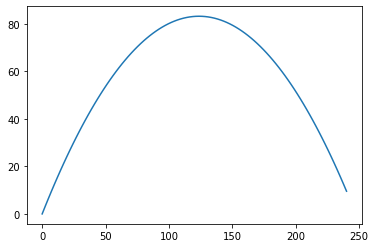

In [16]:
time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40

x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1,len(time)):
    x_array = time_step_array2(x_array, dt)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    
plt.figure()
plt.plot(x_step, y_step)
plt.show()

It's hard to tell if this is what we expect.  So, create the energy plot to confirm that this is as we expected.  Make sure your code is now using the ``time_step_array2()`` function

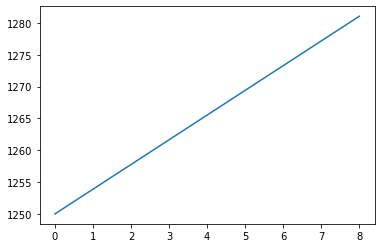

In [17]:
def energy_array2(x,y,vx,vy):
    return 0.5*(vx**2 + vy**2) + 9.8 * y

time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
e_step = np.zeros(len(time))

x_array[0] = 0
x_array[1] = 0
x_array[2] = 30
x_array[3] = 40

x_step[0] = x_array[0]
y_step[0] = x_array[1]
e_step[0] = energy_array2(x_array[0], x_array[1], x_array[2], x_array[3])

for i in range(1,len(time)):
    x_array = time_step_array2(x_array, dt)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    e_step[i] = energy_array2(x_array[0], x_array[1], x_array[2], x_array[3])

plt.figure()
plt.plot(time, e_step)
plt.show()

Now we want to create a new function to implement Heun's rule:

$$ k1_x = v_x \, \Delta t \qquad k1_y = v_y \, \Delta t$$
$$ k1_{vx} = a_x \, \Delta t \qquad k1_{vy} = a_y \, \Delta t$$

$$ k2_x = (v_x + k1_{vx}) \, \Delta t \qquad k2_y = (v_y + k1_{vy}) \, \Delta t$$
$$ k2_{vx} = a_x \, \Delta t \qquad k2_{vy} = a_y \, \Delta t$$

$$ x_f = x + 0.5 (k1_x + k2_x) \qquad y_f = y + 0.5 (k1_y + k2_y)$$
$$ v_{xf} = v_x + 0.5 (k1_{vx} + k2_{vx}) \qquad v_{yf} = v_y + 0.5 (k1_{vy} + k2_{vy})$$

Which comes in three main steps:
- Create a $k1$ array, ``k1 = derivative1 * dt``; but before that we need to define ``derivative1``, which is ``[vx, vy, ax, ay]``, must like before.
- Create a $k2$ array, ``k2 = derivative2 * dt``; where we need to first define ``derivative2``, which is ``[vx+k1vx, vy+k1vy, ax, ay]``.  This is more difficult, because we need to use specific elements in the ``k1`` array (which index corresponds to $v_x$ and $v_y$??).
- Finally, we get the final values, ``x_final = x_in + 0.5 * (k1 + k2)``.
- Return this final value.

Create this function, then solve for the motion, creating -- as before -- plots of the trajectory and of the energy as a function of time.  Make sure they both work.

In [18]:
def energy3(x_in, dt):
    ax = 0
    ay = -9.8
    
    derivative1 = np.zeros(4)
    derivative1[:] = [x_in[2], x_in[3], ax, ay]
    
    k1 = 0
    k1 = derivative1 * dt
    
    derivative2 = np.zeros(4)
    derivative2[:] = [x_in[2]+k1[2], x_in[3]+k1[3], ax, ay]
    
    k2 = 0
    k2 = derivative2 * dt
    
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

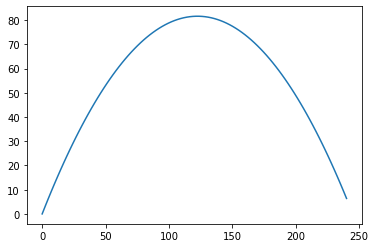

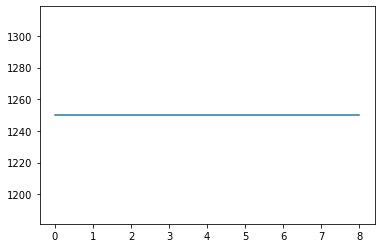

In [19]:
time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
e_step = np.zeros(len(time))

x_array[0] = 0
x_array[1] = 0
x_array[2] = 30
x_array[3] = 40

x_step[0] = x_array[0]
y_step[0] = x_array[1]
e_step[0] = energy_array2( x_array[0], x_array[1], x_array[2], x_array[3])

for i in range(1,len(time)):
    x_array = energy3(x_array, dt)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    e_step[i] = energy_array2(x_array[0], x_array[1], x_array[2], x_array[3])
    
plt.figure()
plt.plot(x_step, y_step)
plt.show()

plt.figure()
plt.plot(time, e_step)
plt.show()

**If you have time, completing this is your homework:** Let's include air resistance:
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x = - b v_x$$
$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y = -g - b v_y$$
using $g = 9.8$ and $b = 0.1$.  You should write code that:
- rewrites the ``time_step_array2`` function (Euler's method) to incorporate a different ``ax`` and ``ay``.  Note that these involve $v_x$ and $v_y$.
- Use the same initial conditions, and plot the result
- Include the projectile model as a second curve on the plot to see the difference.  Make sure at least one of the curves has a different ``linestyle``.
- Plot energy vs. time to see that the results at least physically make sense.

In [20]:
def time_step_air_res(x_in, dt):
    g = 9.8
    b = 0.1
    ax = -b * x_array[2]
    ay = -g - b * x_array[3]

    derivative = np.zeros(4)
    derivative[:] = [x_in[2], x_in[3], ax, ay]
    
    x_final = x_in + derivative * dt
    
    return x_final

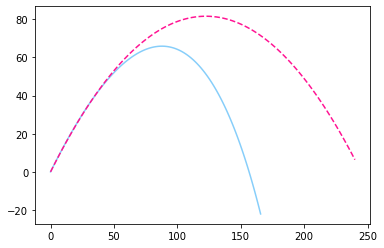

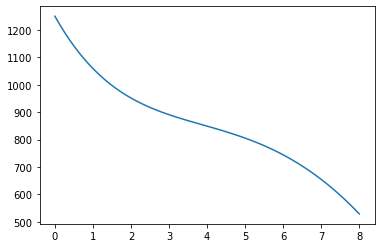

In [21]:
time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step_air = np.zeros(len(time))
y_step_air = np.zeros(len(time))
e_step_air = np.zeros(len(time))

x_array[0] = 0
x_array[1] = 0
x_array[2] = 30
x_array[3] = 40

x_step_air[0] = x_array[0]
y_step_air[0] = x_array[1]
e_step_air[0] = energy_array2( x_array[0], x_array[1], x_array[2], x_array[3])

for i in range(1,len(time)):
    x_array = time_step_air_res(x_array, dt)
    x_step_air[i] = x_array[0]
    y_step_air[i] = x_array[1]
    e_step_air[i] = energy_array2(x_array[0], x_array[1], x_array[2], x_array[3])
    
plt.figure()
plt.plot(x_step_air, y_step_air, color="lightskyblue")
plt.plot(x_step, y_step, color="deeppink", linestyle="--")
plt.show()

plt.figure()
plt.plot(time, e_step_air)
plt.show()